In [ ]:
# pip install canopy_cover

In [2]:
import os
os.environ['PROFILE'] = 'local'
os.environ['NAMESPACE'] = 'research'

from agrobrain_util.runtime.evironment import RuntimeEnv

env = RuntimeEnv()

import skimage.io as io
import matplotlib.pyplot as plt
from agrobrain_image_processing.canopy.canopy import canopy_by_hsv
from agrobrain_canopy.canopy_cover.canopy_cover import CanopyCover
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
from skimage.color import rgb2gray
from tqdm import tqdm


image_id = 9690348

im_path = env.download_image(image_id)
im = io.imread(im_path)

index_canopy = CanopyCover.canopy_cover(im_path)
hsv_canopy = canopy_by_hsv(im)

DATA_DIR = "data"
IMAGES_DIR = "images"

could not find stamp in environment variables
could not find stamp in environment variables
could not find KUBEFLOW_API_BASIC_AUTH_TOKEN in environment variables
could not find AI_RABBITMQ_CONNECTION_STRING in environment variables
could not find AI_MONGO_DB_CONNECTION_STRING in environment variables
could not find TARANIS_DB_CONNECTION_STRING in environment variables
could not find GLOBAL_DB_CONNECTION_STRING in environment variables
could not find AI_MONGO_DB_CONNECTION_STRING_NEW in environment variables
could not find MONGO_DB_CONNECTION_STRING in environment variables


In [ ]:
# SAMPLE 100 IMAGES AND SAVE THEIR CANOPY COVER

sampled_images_df = pd.read_csv(os.path.join(DATA_DIR, "weeds_images_df_light.csv")).sample(n=100)
sampled_images_df['wideImageID'] = env.eti_api.get_matching_wide_images(list(sampled_images_df['imageID']))


In [ ]:
sampled_images_df.columns

In [ ]:
index_canopy = CanopyCover.canopy_cover(im_path)

In [ ]:
hsv_canopy.astype(np.uint8) * 255

In [ ]:

index_canopy[0].shape

In [ ]:
# SAVE SAMPLE IMAGES CANOPY COVERAGE
canopy_images_folder = os.path.join(IMAGES_DIR, f"canopy_cover")
os.makedirs(canopy_images_folder, exist_ok=True)

for wide_im_id in tqdm(sampled_images_df['wideImageID']):
    im_path = env.download_image(wide_im_id)
    im = io.imread(im_path)
    index_canopy = CanopyCover.canopy_cover(im_path)[0].astype(np.uint8) * 255
    # xored_image_index_canopy = np.logical_xor(index_canopy[0], 255)
    index_canopy_image_path = os.path.join(canopy_images_folder, f"{wide_im_id}_index_canopy.jpg")
    io.imsave(index_canopy_image_path, index_canopy)
    hsv_canopy = canopy_by_hsv(im).astype(np.uint8) * 255
    # xored_image_hsv_canopy = np.logical_xor(hsv_canopy, 255)
    hsv_canopy_image_path = os.path.join(canopy_images_folder, f"{wide_im_id}_hsv_canopy.jpg")
    io.imsave(hsv_canopy_image_path, hsv_canopy)

In [ ]:
# 6502662, 7359188, 9644563, 9134832, 

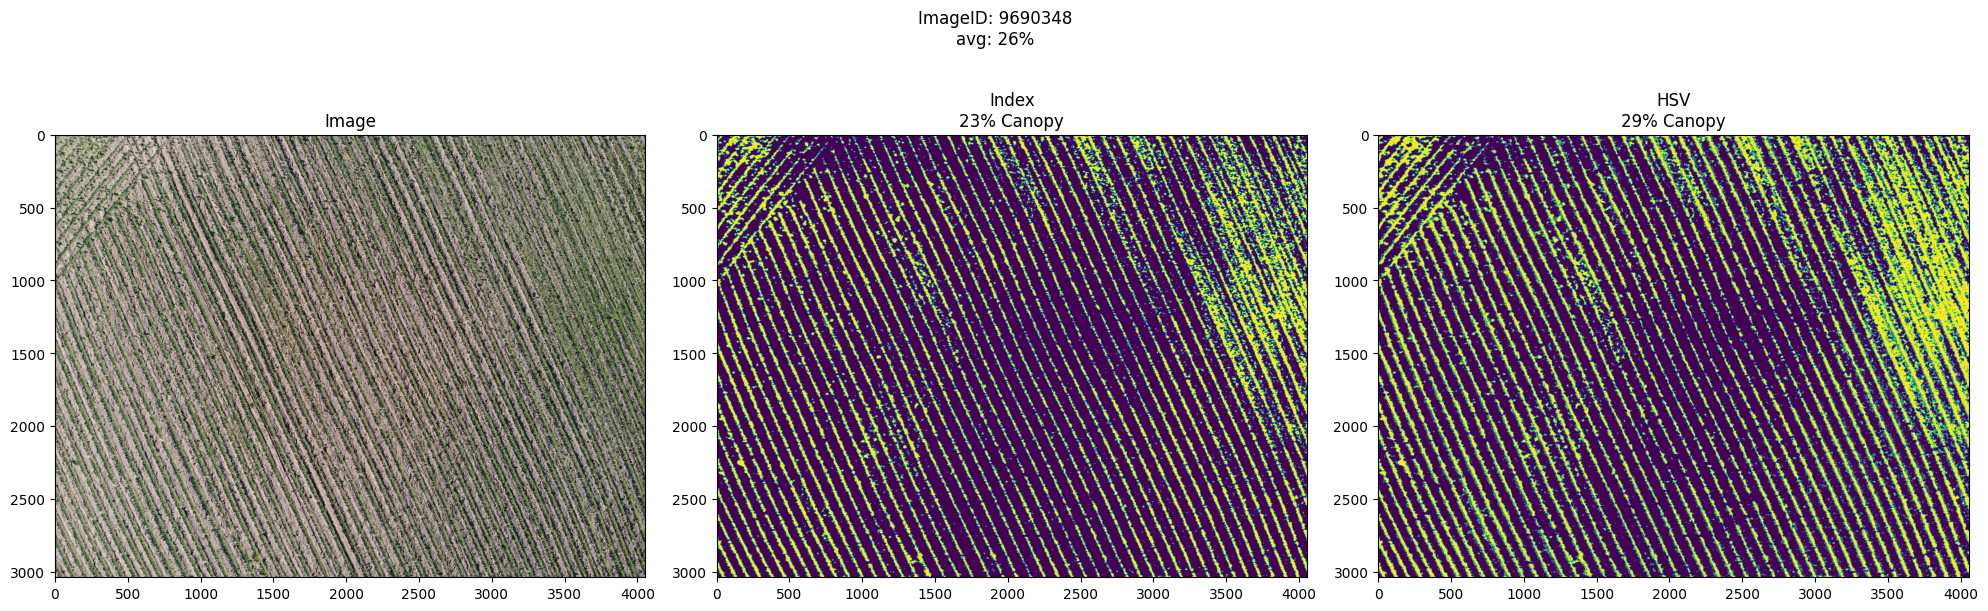

In [13]:
# SAVE CANOPY COVER IMAGES SUBPLOTS

canopy_images_folder = os.path.join(IMAGES_DIR, f"canopy_cover_1")
os.makedirs(canopy_images_folder, exist_ok=True)

# Set the figure size and create the subplots
fig_width = 20
fig, axes = plt.subplots(1, 3, figsize=(fig_width, fig_width/3))

# Define the images (replace with your own images)
images = [im, index_canopy[0], hsv_canopy]
im_size = hsv_canopy.shape[0] * hsv_canopy.shape[1]
hsv_canopy_sum = np.count_nonzero(hsv_canopy)
hsv_canopy_percent = int(hsv_canopy_sum/im_size * 100)
canopy_index_sum = np.count_nonzero(index_canopy[0])
canopy_index_percent = int(canopy_index_sum/im_size * 100)
avg = int(sum([hsv_canopy_percent, canopy_index_percent])/2)

# Define the titles and subtitles for each image
titles = [f'Image', f'Index\n{canopy_index_percent}% Canopy', f'HSV\n{hsv_canopy_percent}% Canopy']

# Plot the first image
axes[0].imshow(images[0])
axes[0].set_title(titles[0])

# Plot the second image
axes[1].imshow(images[1])
axes[1].set_title(titles[1])

# Plot the third image
axes[2].imshow(images[2])
axes[2].set_title(titles[2])

# Set the global title for the entire plot
# plt.suptitle(f'ImageID: {image_id}\ncanopy_index_percent: {canopy_index_percent}%, hsv_canopy_percent: {hsv_canopy_percent}%\navg: {avg}%')
plt.suptitle(f'ImageID: {image_id}\navg: {avg}%')

plt.savefig(os.path.join(canopy_images_folder, f'canopy_cover_im_{image_id}.jpg'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Set the figure size and create the subplots
fig_width = 20
fig, axes = plt.subplots(1, 3, figsize=(fig_width, fig_width/3))

# Define the images (replace with your own images)
images = [combinations, index_canopy[0], hsv_canopy]

# Define the titles and subtitles for each image
titles = ['Image', 'Index Canopy', 'HSV canopy']

# Plot the first image
# axes[0].imshow(images[0])
cax = axes[0].imshow(combinations, cmap=cmap, interpolation='nearest')
axes[0].set_title(titles[0])

# Plot the second image
axes[1].imshow(images[1])
axes[1].set_title(titles[1])

# Plot the third image
axes[2].imshow(images[2])
axes[2].set_title(titles[2])

# Set the global title for the entire plot
plt.suptitle('Three Images')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# DIFF MAP - INDEX CANOPY AND HSV

image1 = hsv_canopy
image2 = index_canopy[0]

array1_int = image1.astype(np.int)
array2_int = image2.astype(np.int)

combinations = (array1_int << 1) + array2_int # bitwise left shift (equivalent to multiply by 2)

# cmap = plt.cm.colors.ListedColormap(['silver', 'plum', 'indianred', 'mediumseagreen'])
cmap = plt.cm.colors.ListedColormap(['black', 'red', 'green', 'black'])


fig, ax = plt.subplots(figsize=[20, 30])

cax = ax.imshow(combinations, cmap=cmap, interpolation='nearest')

cbar = fig.colorbar(cax, shrink=0.3)
ticks = [0, 1, 2, 3]
ticklabels = ['FF', 'FT', 'TF', 'TT']
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticklabels)

ax.set_title('Difference between HSV and Index canopy')

plt.show()

In [ ]:
# TRY - REGION GROWING

def region_growing(image, seed):
    # Create a binary mask of the same size as the image
    height, width = image.shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)

    # Define a threshold for pixel similarity
    threshold = 20

    # Get the seed pixel intensity values for each channel
    seed_values = image[seed[0], seed[1]]

    # Create a queue to store the coordinates of the pixels to be processed
    queue = []
    queue.append(seed)

    # Define the neighbors offsets (8-connectivity)
    neighbors_offsets = [(-1, -1), (-1, 0), (-1, 1),
                         (0, -1),           (0, 1),
                         (1, -1), (1, 0), (1, 1)]

    # Start region growing
    while len(queue) > 0:
        # Pop the pixel coordinates from the queue
        pixel = queue.pop(0)

        # Set the pixel as part of the region in the mask
        mask[pixel[0], pixel[1]] = 255

        # Check the neighboring pixels
        for offset in neighbors_offsets:
            neighbor = (pixel[0] + offset[0], pixel[1] + offset[1])

            # Check if the neighbor is within the image boundaries
            if neighbor[0] >= 0 and neighbor[0] < height and neighbor[1] >= 0 and neighbor[1] < width:
                # Check if the neighbor pixel is not already part of the region and its intensity is similar to the seed pixel
                neighbor_values = image[neighbor[0], neighbor[1]]
                intensity_diff = np.abs(neighbor_values - seed_values)
                if mask[neighbor[0], neighbor[1]] == 0 and np.all(intensity_diff <= threshold):
                    # Add the neighbor pixel to the queue for further processing
                    queue.append(neighbor)

    return mask

# Load the image
image = io.imread(im_path)  # Read as RGB image

# Convert the image to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = rgb2gray(image)

# Define the seed pixel coordinates
seed_pixel = (100, 100)

# Apply region growing
result = region_growing(gray_image, seed_pixel)

# Display the result
plt.imshow(result, cmap='gray')

# plt.colorbar()
plt.show()
# cv2.imshow('Region Growing', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
